<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%AC%ED%99%94_2%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/CNN_keras_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install --upgrade keras

In [102]:
import os
os.environ['BACKEND'] = 'tensorflow' # 백엔드로 텐서플로우를 동작 시킴 # PyTorch, JAX도 가능

In [103]:
import keras # 외부 케라스 가져오기
keras.__version__

'3.2.1'

##  CIFAR-10

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras

In [150]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [151]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape
         # 32 x 32 컬러    클래스

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [152]:
labels = {0: 'Airplane',
          1: 'Automobile',
          2: 'Bird',
          3: 'Cat',
          4: 'Deer',
          5: 'Dog',
          6: 'Frog',
          7: 'Horse',
          8: 'Ship',
          9: 'Truck',
          }

id = 500
다음 그림은 Deer


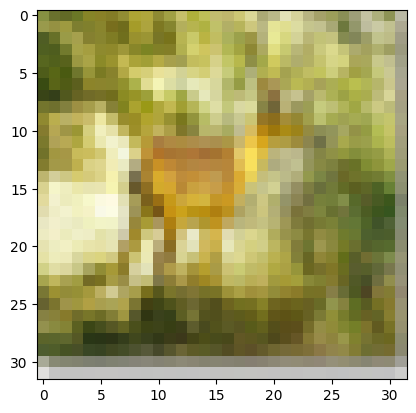

In [153]:
id = np.random.randint(0, 10000)
print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]}')
plt.imshow(test_x[id])
plt.show()

### Modeling
 - Sequentital, Functional 둘 중 하나

In [10]:
train_x = train_x / 255
test_x = test_x / 255

In [71]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D # CNN
from keras.optimizers import Adam
from keras.backend import clear_session
from sklearn.metrics import *

In [115]:
# 1. 메모리 청소
clear_session()

# 2. 모델 정의
model = Sequential([
    Input(shape=(32, 32, 3)),
    keras.layers.Rescaling(1/255), # 스케일링
    Flatten(),  # 2D -> 1D
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),         #
    Dense(128, activation='relu'),        # VGG
    Dense(128, activation='relu'),        #
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')])  # 10개의 클래스에 대한 확률을 출력하는 레이어

# .add 방식
# model1.add( Input(shape=(32,32,3)) )
# model1.add( keras.layers.Rescaling(1/255) )
# model1.add( Flatten() )
# model1.add( Dense(64, activation='relu'))
# model1.add( Dense(64, activation='relu'))
# model1.add( Dense(128, activation='relu') )
# model1.add( Dense(128, activation='relu') )
# model1.add( Dense(256, activation='relu') )
# model1.add( Dense(256, activation='relu') )
# model1.add( Dense(10, activation='softmax') )

# 3. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [116]:
from keras.callbacks import EarlyStopping

In [117]:
es = EarlyStopping(monitor='val_loss',  # 얼리스토핑을 적용할 관측 지표
                   min_delta=0.001,     # 임계값, 낮을 수록 좋음
                   patience=5,          # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,           # 몇 번째 epochs에서 얼리스토핑이 되었느가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epochs 시점으로 가중치를 되돌림
                   )


In [118]:
# 모델 학습
model.fit(train_x, train_y, epochs=20,validation_split=.2, callbacks=[es])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1631 - loss: 2.1401 - val_accuracy: 0.2124 - val_loss: 2.0335
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2482 - loss: 1.9638 - val_accuracy: 0.2738 - val_loss: 1.9226
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2936 - loss: 1.8701 - val_accuracy: 0.3049 - val_loss: 1.8617
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3248 - loss: 1.8043 - val_accuracy: 0.3378 - val_loss: 1.7960
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3554 - loss: 1.7529 - val_accuracy: 0.3488 - val_loss: 1.7632
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3700 - loss: 1.7131 - val_accuracy: 0.3737 - val_loss: 1.7179
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3872 - loss: 1.6725 - val_accuracy: 0.3924 - val_loss: 1.6824
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4027 - loss: 1.6408 - 

In [119]:
pred = model.predict(test_x)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [120]:
print(accuracy_score(test_y, pred))
print()
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

0.4558

[[455  41  59  92  11  10  25  71 205  31]
 [ 24 645   5  82   6  13  10  39 107  69]
 [ 69  34 268 194  64  68 102 152  39  10]
 [ 19  19  64 518  22 122  86 100  36  14]
 [ 39  16 181 142 219  44 107 213  32   7]
 [  9  15  62 357  33 273  59 135  49   8]
 [  5  13  90 241  68  31 469  60  13  10]
 [ 21  20  31 114  32  50  15 657  28  32]
 [ 64  73   8  81  10  14   4  19 696  31]
 [ 32 289   1  91   4   6  23  77 119 358]]
              precision    recall  f1-score   support

           0       0.62      0.46      0.52      1000
           1       0.55      0.65      0.60      1000
           2       0.35      0.27      0.30      1000
           3       0.27      0.52      0.36      1000
           4       0.47      0.22      0.30      1000
           5       0.43      0.27      0.33      1000
           6       0.52      0.47      0.49      1000
           7       0.43      0.66      0.52      1000
           8       0.53      0.70      0.60      1000
           9       0

### CNN으로 모델링

In [165]:
import keras

from keras.utils import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D

In [164]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

In [167]:
# 메모리 창소
clear_session()

# 모델 정의
model = Sequential([
    keras.layers.Rescaling(1/255), # 스케일링
    Conv2D(filters=64,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    Conv2D(filters=64,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    MaxPooling2D(pool_size=2, # pooling 필터의 가로 세로 사이즈
                 strides=2),  # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)

    Conv2D(filters=128,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    Conv2D(filters=128,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    MaxPooling2D(pool_size=2, # pooling 필터의 가로 세로 사이즈
                 strides=2),  # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)

    Conv2D(filters=256,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    Conv2D(filters=256,              # 서로 다른 필터 64개 사용
           kernel_size=3,           # Conv2D 필터의 가로 세로 사이즈
           input_shape=(32, 32, 3), # Conv2D 필터의 이동 보폭
           padding='same',          # feature map 사이즈 유지, 외곽 정도 더 반영
           activation='relu'),

    MaxPooling2D(pool_size=2, # pooling 필터의 가로 세로 사이즈
                 strides=2),  # pooling 필터의 이동 보폭 (기본적으로 pool_size를 따름)

    Flatten(),  # 2D -> 1D
    Dense(10, activation='softmax')])  # 10개의 클래스에 대한 확률을 출력하는 레이어

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [170]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
# 모델 학습
model.fit(train_x, train_y, epochs=20, validation_split=0.2, callbacks=[es])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.3156 - loss: 1.8416 - val_accuracy: 0.5770 - val_loss: 1.2025
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - accuracy: 0.6130 - loss: 1.0947 - val_accuracy: 0.6809 - val_loss: 0.9299
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7124 - loss: 0.8217 - val_accuracy: 0.7104 - val_loss: 0.8185
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7750 - loss: 0.6424 - val_accuracy: 0.7390 - val_loss: 0.7597
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8205 - loss: 0.5189 - val_accuracy: 0.7534 - val_loss: 0.7377
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8587 - loss: 0.4053 - val_accuracy: 0.7583 - val_loss: 0.7562
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8928 - loss: 0.3049 - val_accuracy: 0.7480 - val_loss: 0.8436
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9180 - loss: 

In [173]:
pred = model.predict(test_x)
pred = np.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [174]:
print(accuracy_score(test_y, pred))
print()
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

0.7474

[[872  11  22  22  11   5   8   5  25  19]
 [ 23 856   5   8   4   4   9   2  15  74]
 [101   4 563  71 114  61  61  15   4   6]
 [ 30   8  52 620  75 116  63  18   9   9]
 [ 37   2  25  61 774  22  37  33   5   4]
 [ 11   3  40 204  51 611  35  31   6   8]
 [ 13   4  27  62  46  19 821   2   1   5]
 [ 27   3  23  58 100  50   7 715   2  15]
 [125  17  13  16   6   2   9   3 789  20]
 [ 48  52   5  15   4   5   5   3  10 853]]
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      1000
           1       0.89      0.86      0.87      1000
           2       0.73      0.56      0.63      1000
           3       0.55      0.62      0.58      1000
           4       0.65      0.77      0.71      1000
           5       0.68      0.61      0.64      1000
           6       0.78      0.82      0.80      1000
           7       0.86      0.71      0.78      1000
           8       0.91      0.79      0.85      1000
           9       0